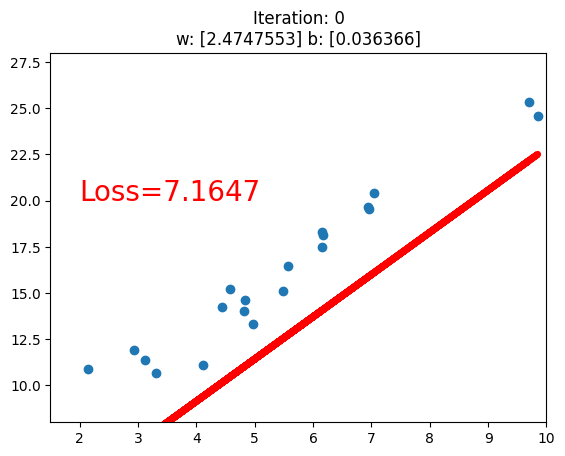

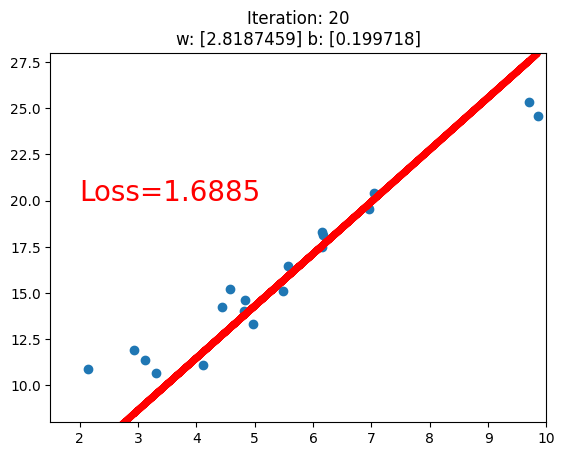

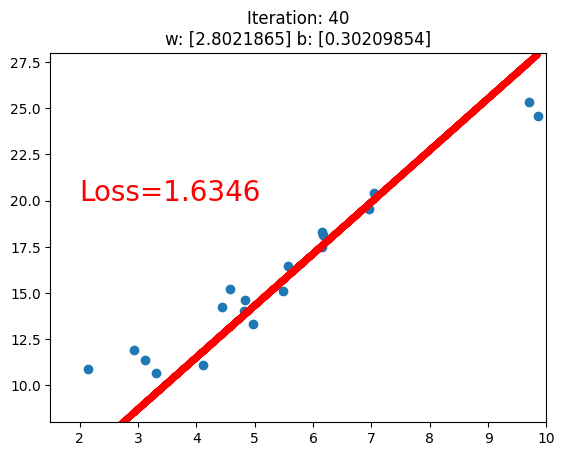

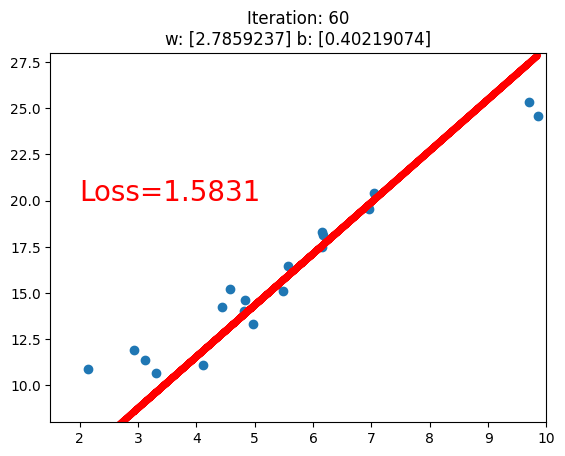

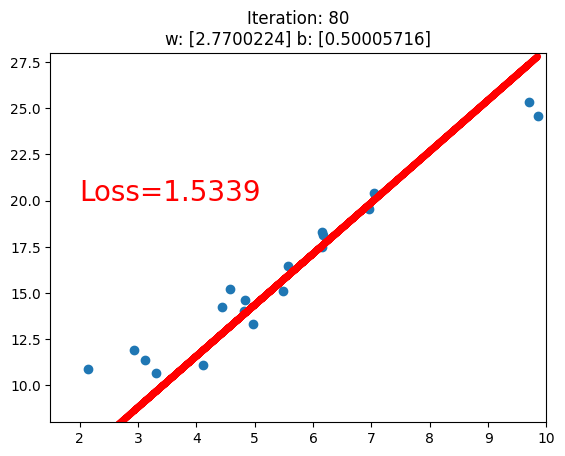

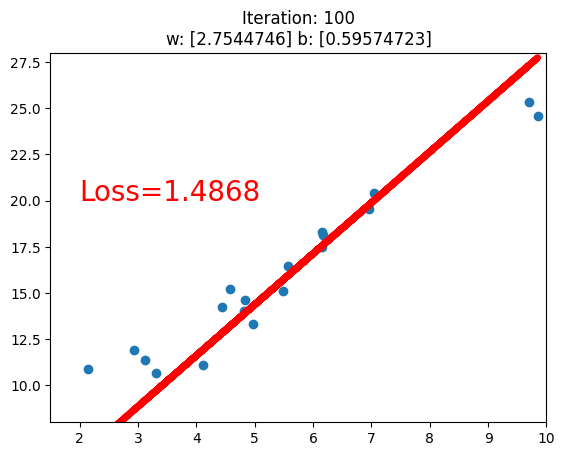

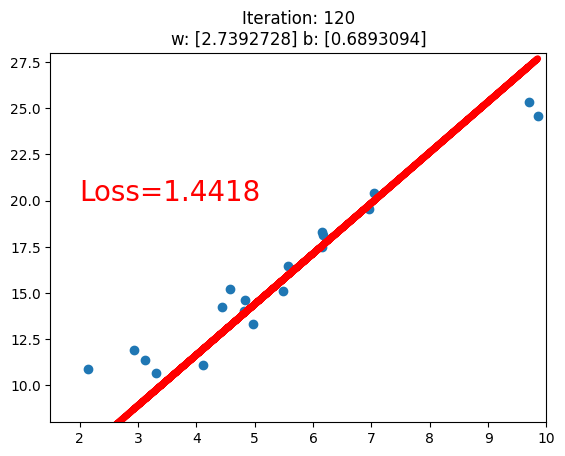

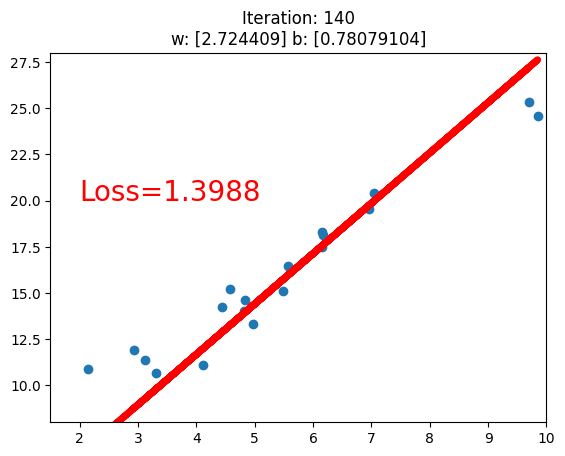

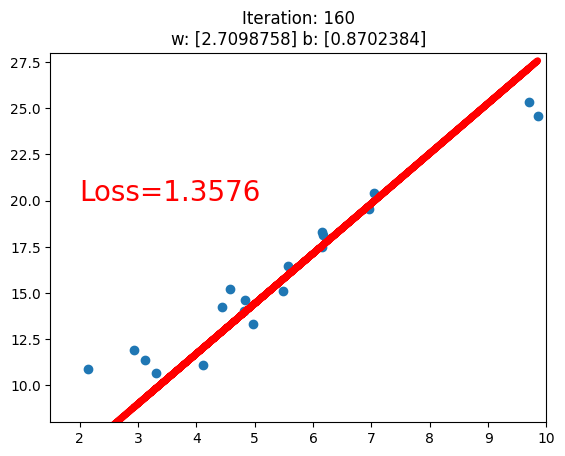

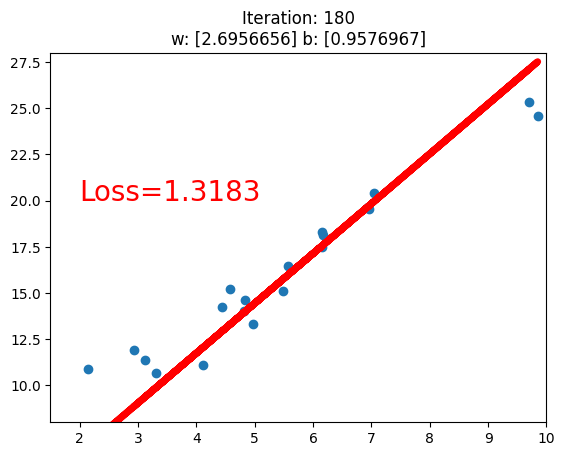

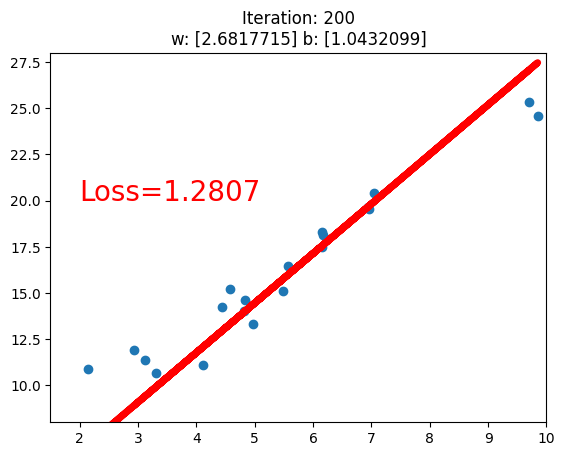

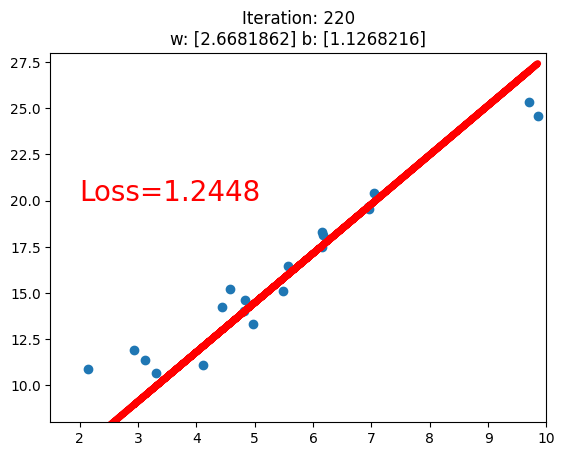

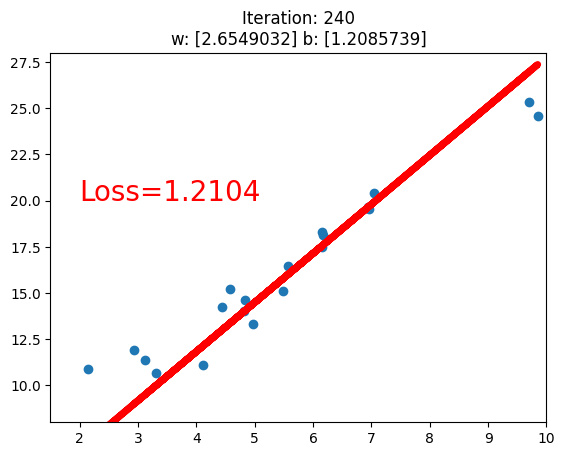

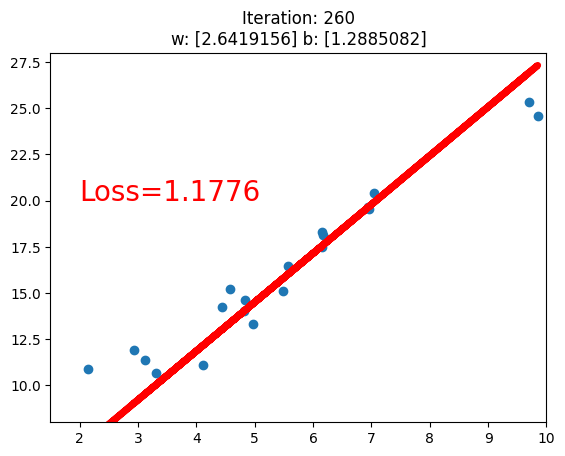

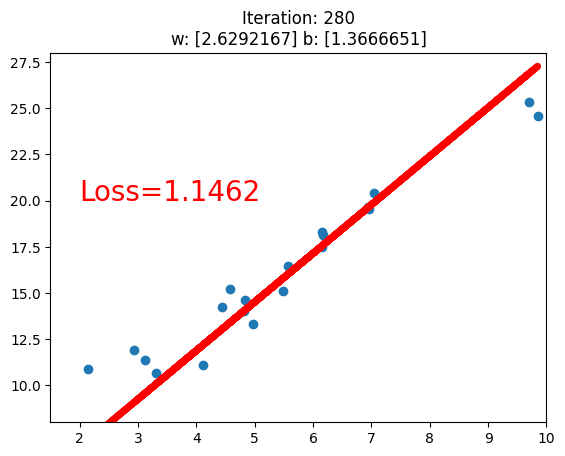

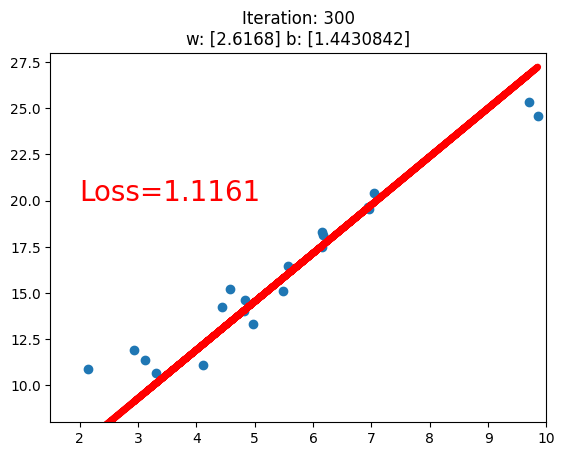

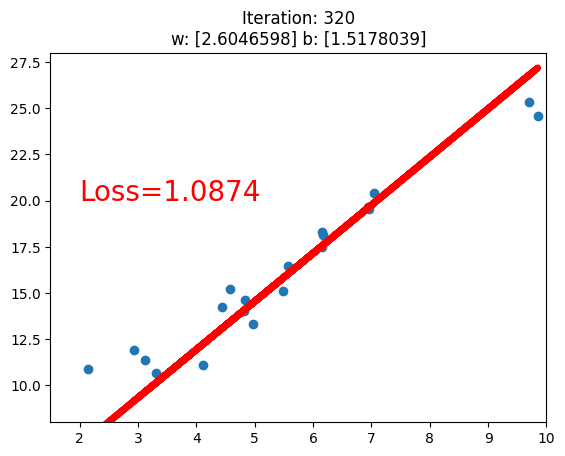

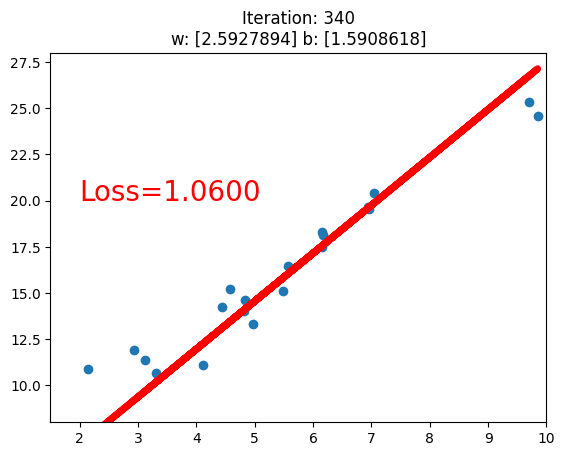

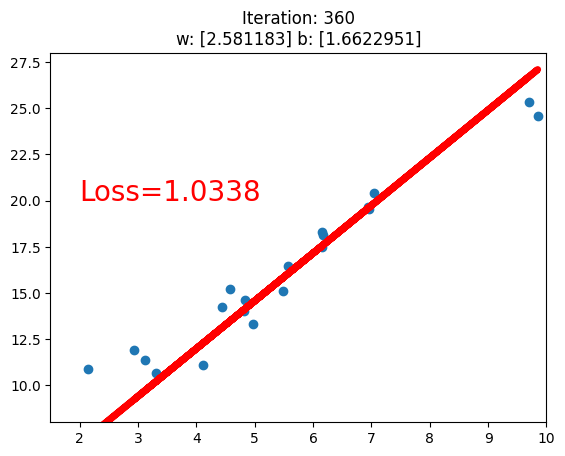

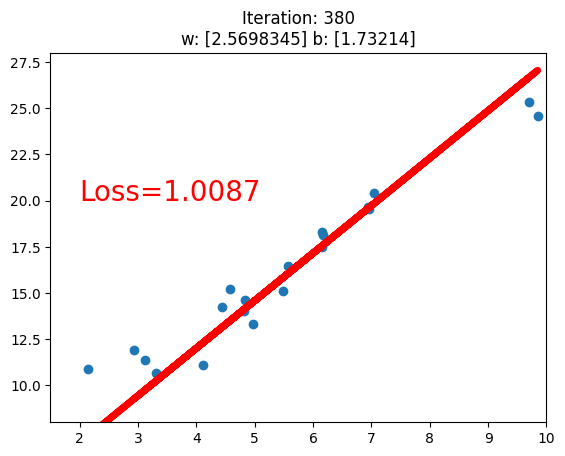

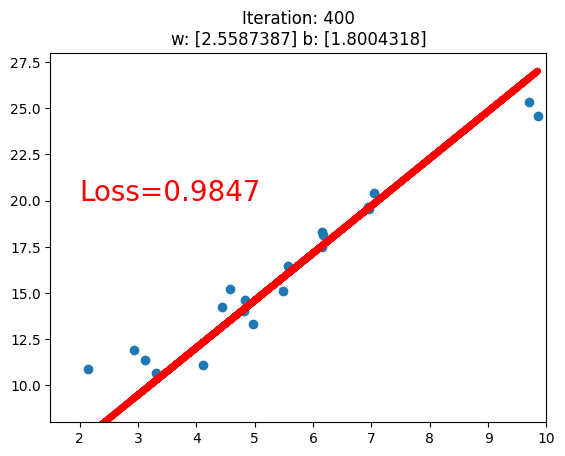

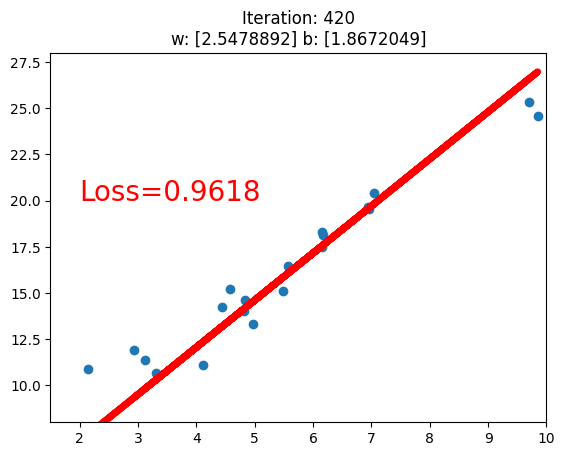

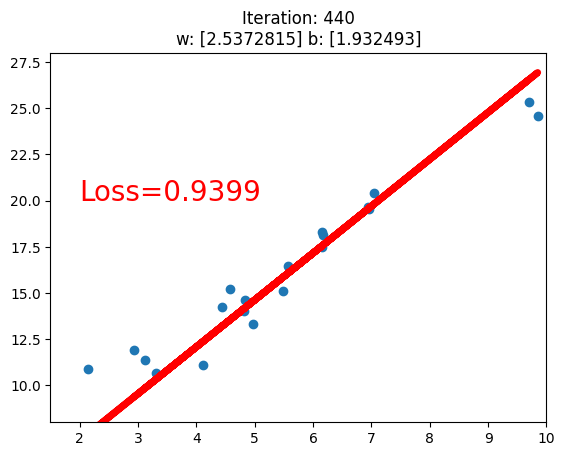

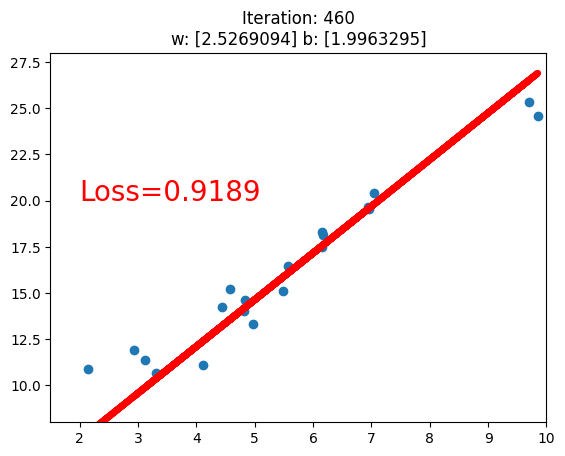

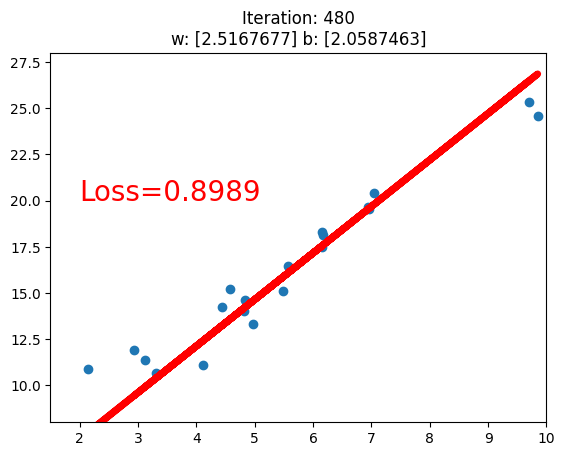

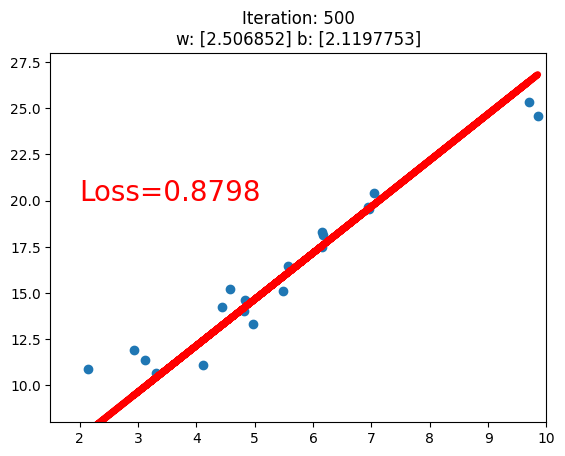

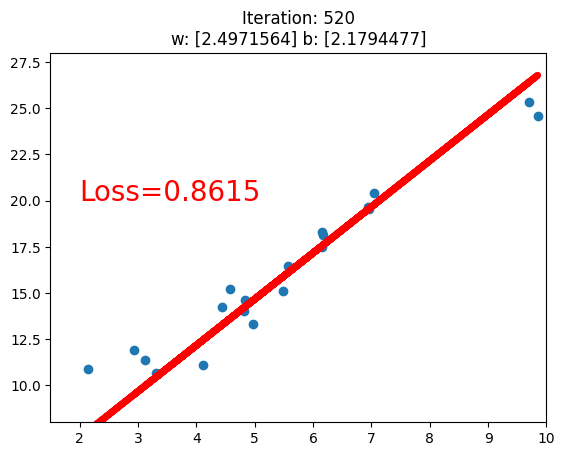

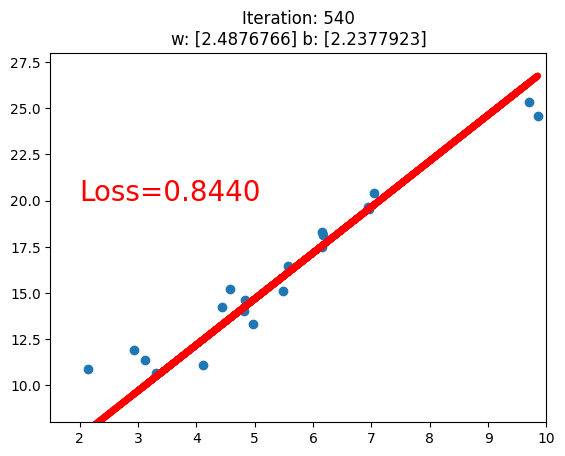

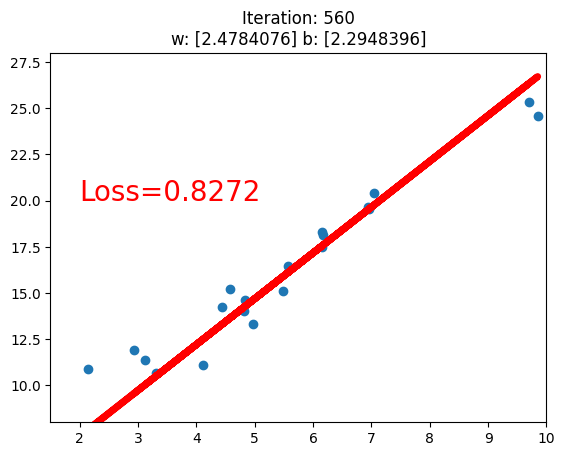

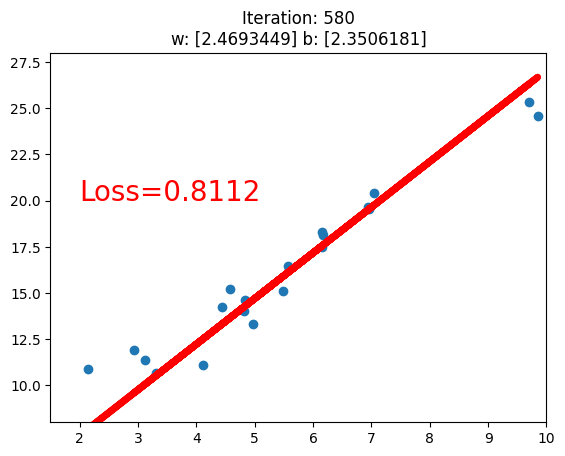

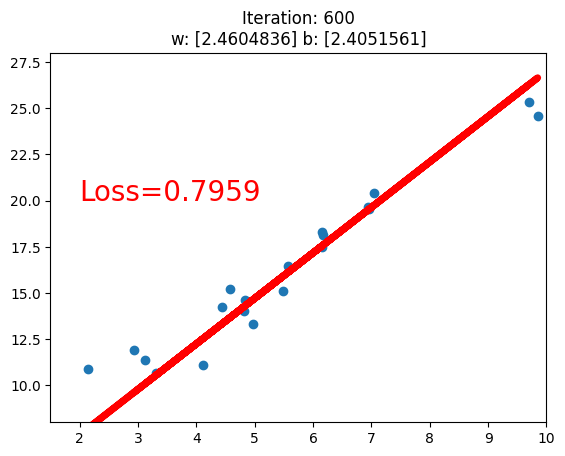

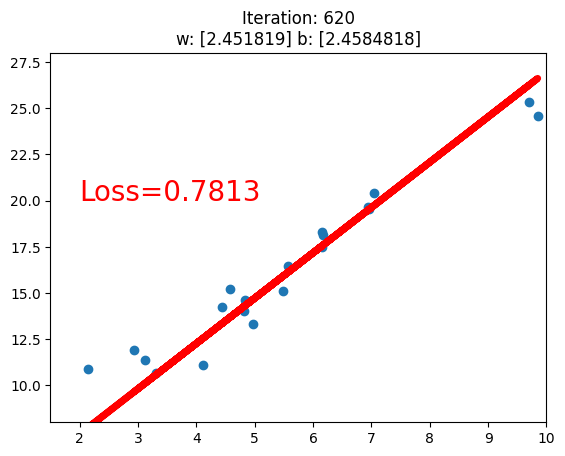

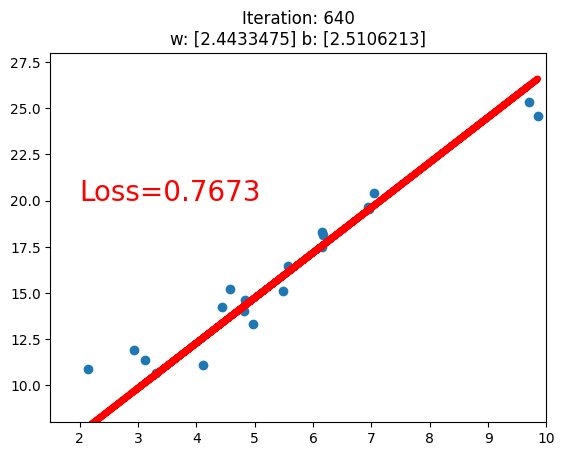

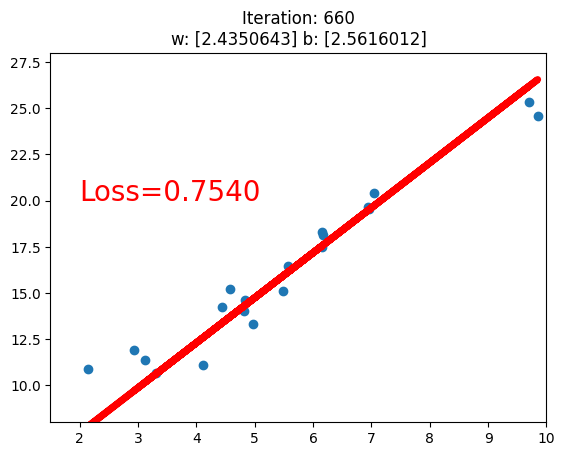

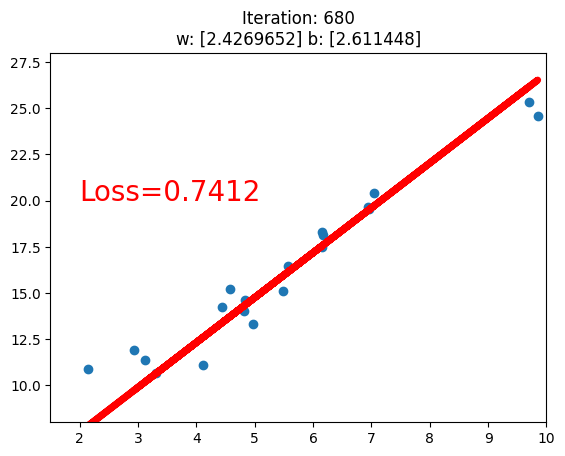

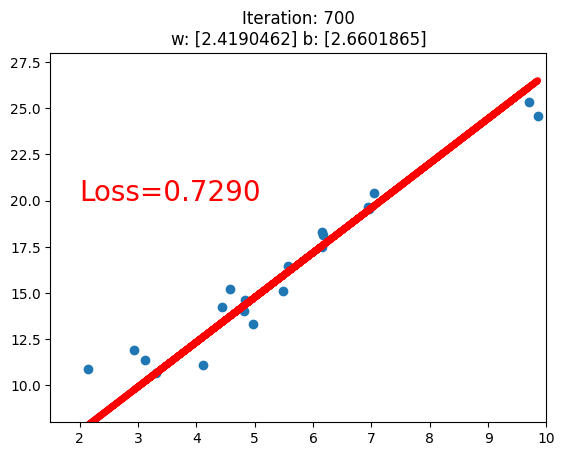

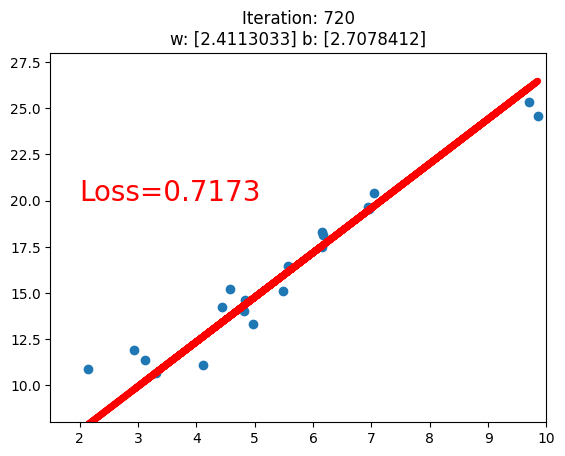

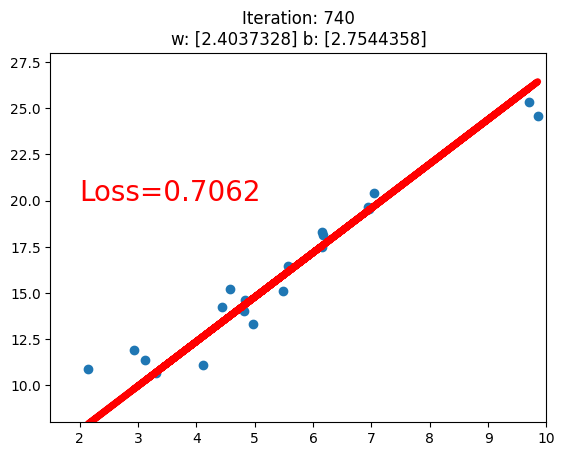

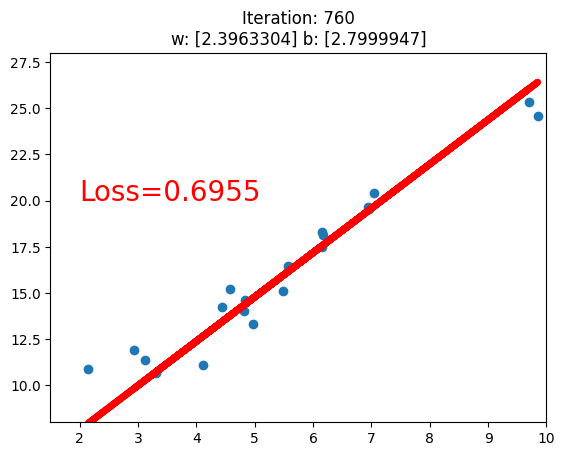

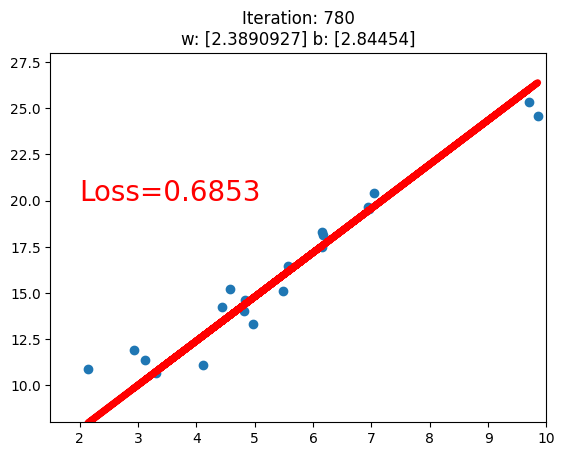

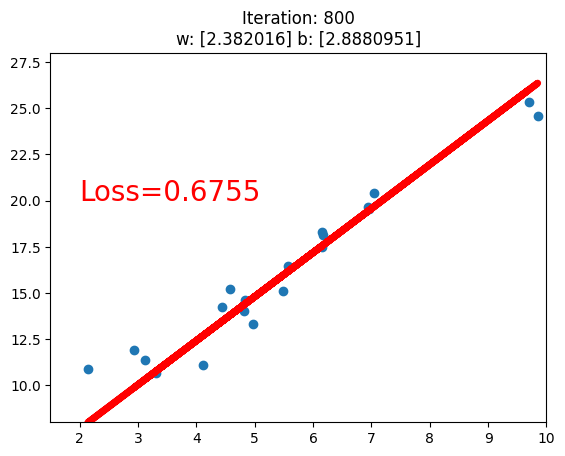

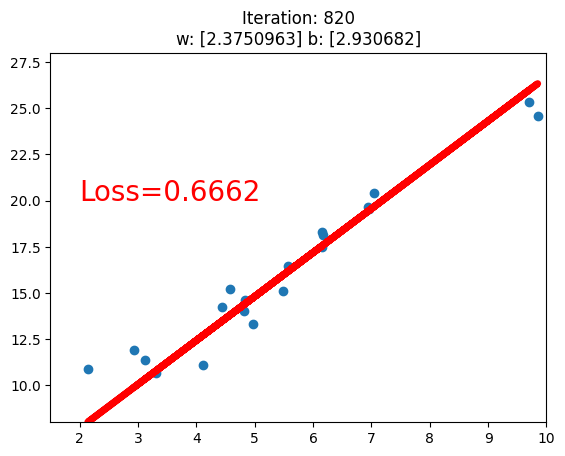

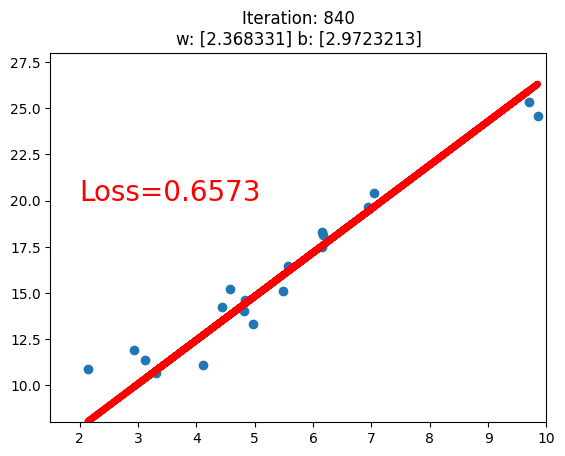

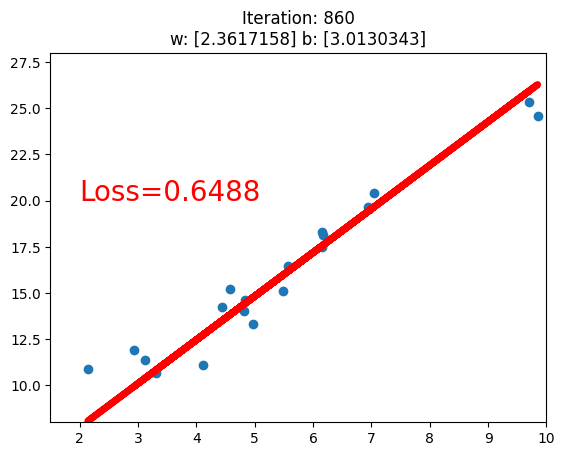

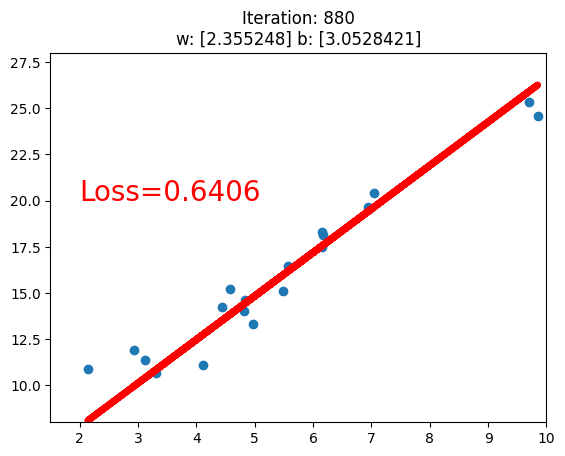

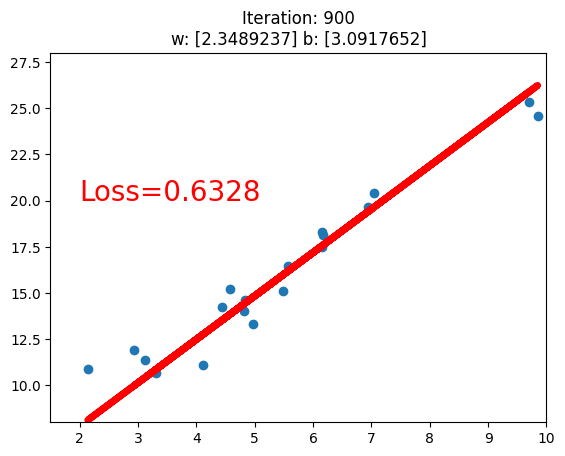

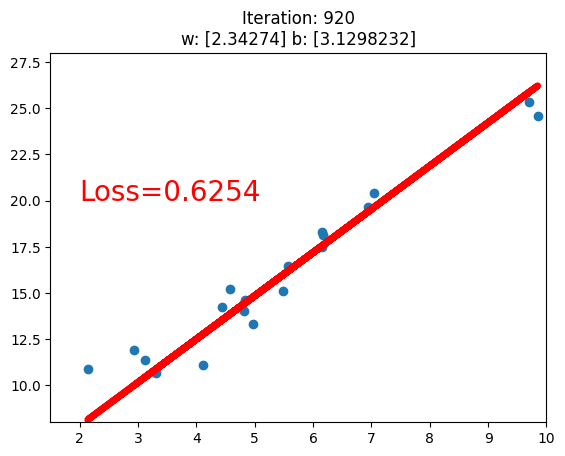

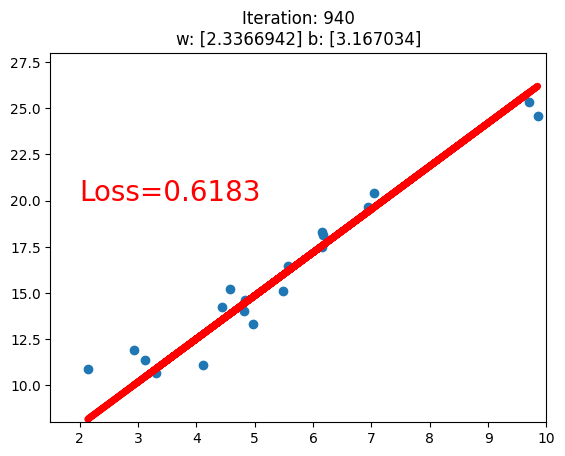

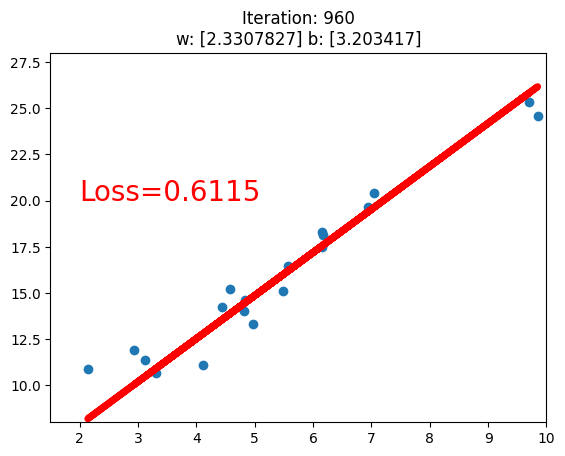

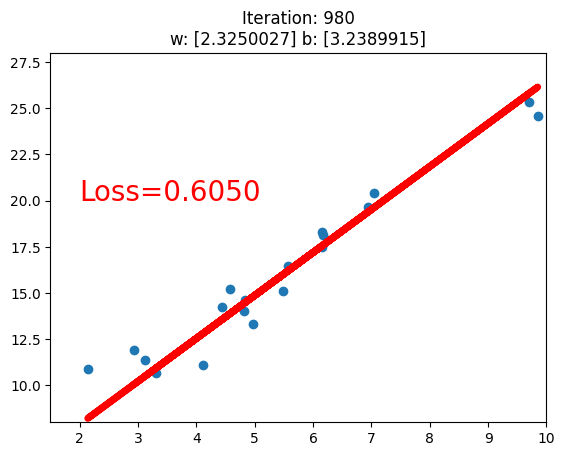

In [2]:
#利用pytorch实现线性回归
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.01  # 学习率，这是梯度下降优化过程中权重更新的步长。

# 创建训练数据
x = torch.rand(20, 1) * 10  # 生成形状为(20, 1)的随机张量，其元素值在0到1之间，然后乘以10，得到范围在0到10之间的模拟输入数据。
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数
w = torch.randn((1), requires_grad=True) #requires_grad=True设置此属性后，张量及其后续计算将被跟踪，可用于反向传播计算梯度
b = torch.zeros((1), requires_grad=True)

for iteration in range(1000):

    # 前向传播
    wx = torch.mul(w, x) #计算权重 w 与输入 x 的逐元素乘积，得到预测的线性部分。
    y_pred = torch.add(wx, b) #将线性部分 wx 与偏置 b 相加，得到最终的预测输出 y_pred

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward() #梯度自动计算并存储在 b.grad 属性中

    # 更新参数
    b.data.sub_(lr * b.grad) #调用b的数值属性，对张量 b.data 的原地（in-place）减法操作
    w.data.sub_(lr * w.grad)

    # 清零张量的梯度
    w.grad.zero_()  #不清零梯度，梯度会累加
    b.grad.zero_()

    # 绘图
    if iteration % 20 == 0: #每进行20次迭代后，就会绘制一次图表

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5) #plt.pause(0.5)让绘图窗口暂停显示0.5秒，以便能够看到图表的变化

        if loss.data.numpy() < 0.1:
            break
